In [43]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

In [44]:
domain_mapping = {418:'ksta', 1677:'tagesspiegel', 35774:'sport1', 694:'gulli', }

In [45]:
results = pd.read_csv('test_results_5_no_unk_recall.csv', delimiter=',', header=None, names=['ranker', 'day', 'domain','correct','total', 'precision', 'recall'])
domains = results['domain']
domains = domains.unique()
domains = domains.tolist()
domains.remove(3336)
domains.remove(2522)
domains.remove(596)
domains.remove(13554)

rankers = results['ranker']
rankers = rankers.unique()

In [46]:
results = results.fillna(0)

In [47]:
domains

[1677, 418, 694, 35774]

In [48]:
results

,ranker,day,domain,correct,total,precision,recall
0,poprank,1,2522,0,0,0.000000,0.000000
1,poprank,1,13554,0,0,0.000000,0.000000
2,poprank,1,3336,0,2,0.000000,0.000000
3,poprank,1,1677,9613,22721,0.423089,0.038560
4,poprank,1,418,679,7251,0.093642,0.053435
5,poprank,1,596,0,0,0.000000,0.000000
6,poprank,1,694,71,460,0.154348,0.234043
7,poprank,1,35774,13148,40333,0.325986,0.107317
8,poprank,2,2522,0,0,0.000000,0.000000
9,poprank,2,13554,0,0,0.000000,0.000000


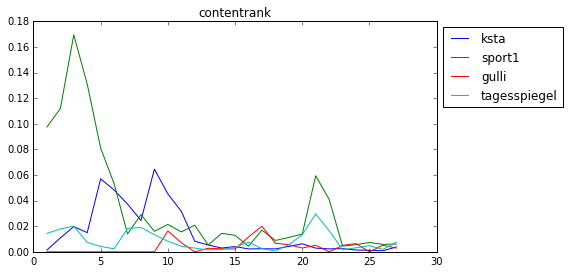

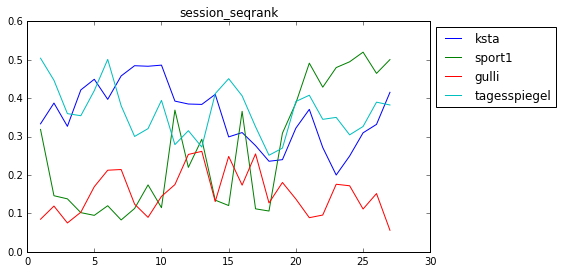

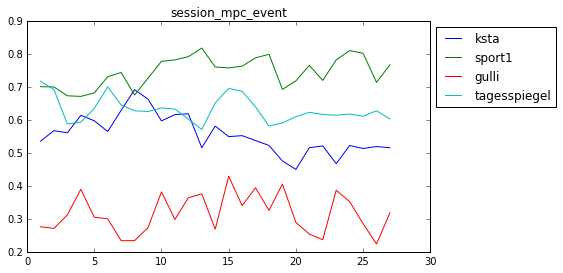

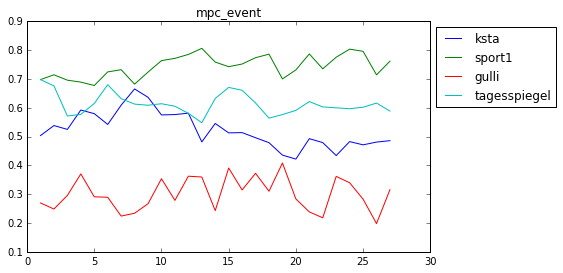

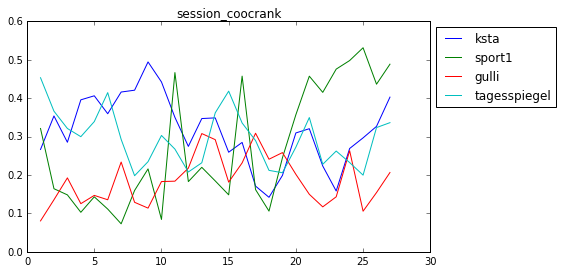

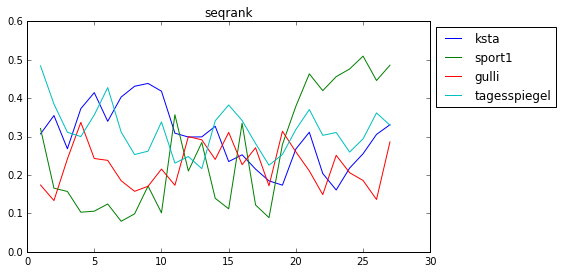

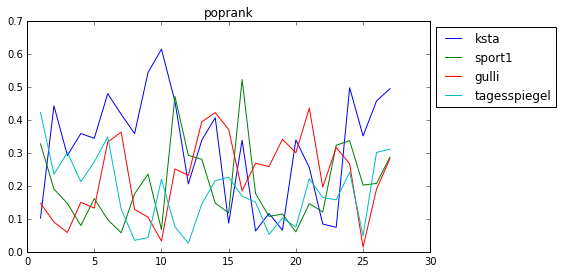

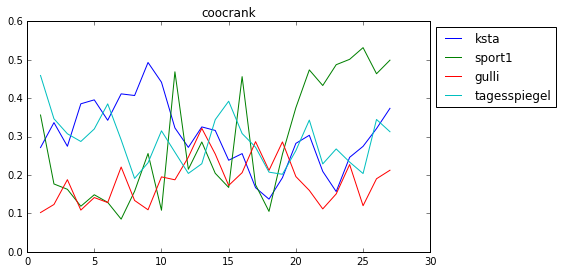

In [24]:
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1.png' % ranker)


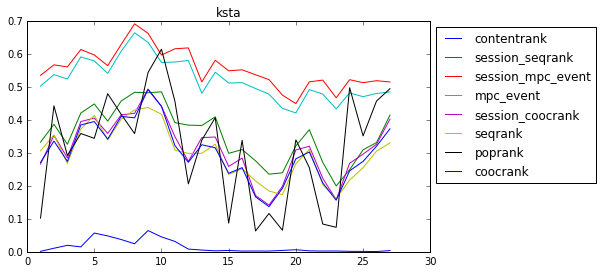

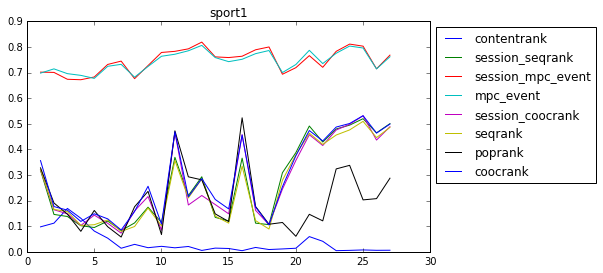

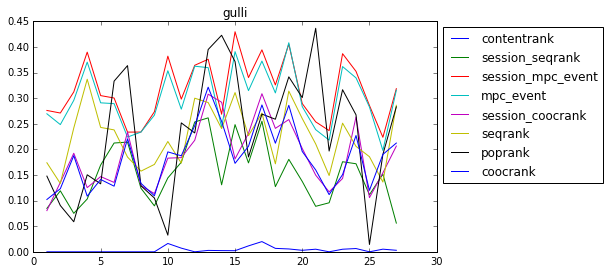

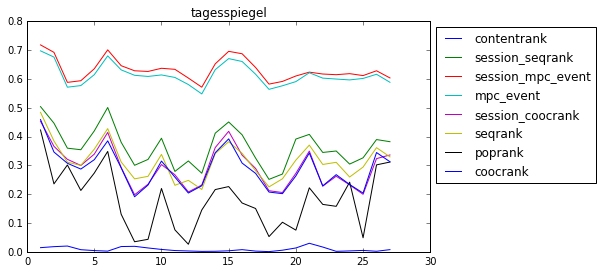

In [25]:
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        precision = subresults['precision']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, precision)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1.png' % domain)

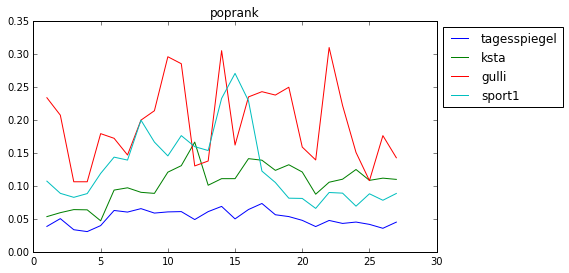

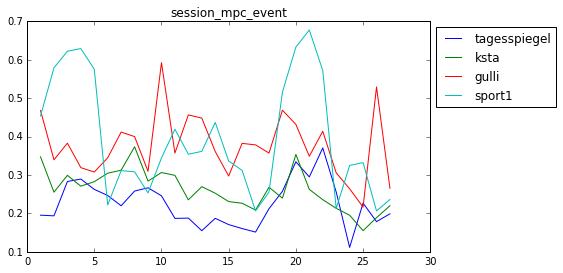

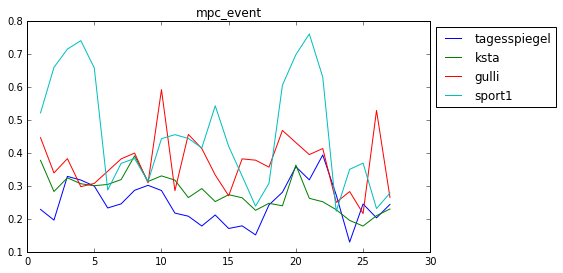

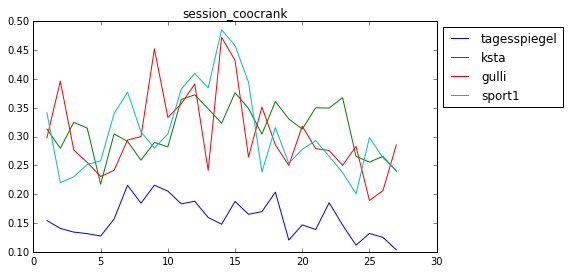

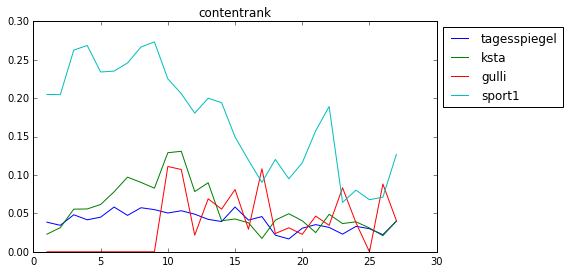

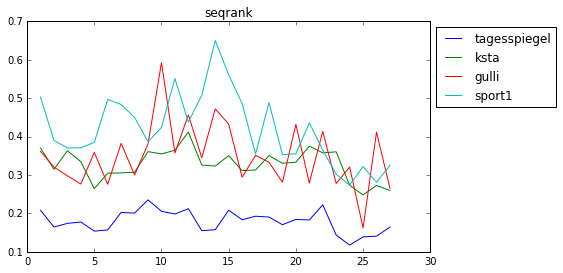

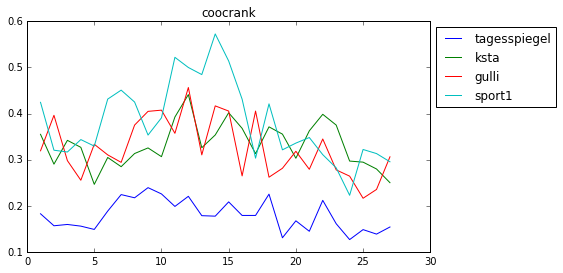

In [15]:
#recall per ranker
i = 0
for ranker in rankers:
    i = i +1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(ranker)
#     plt.title(ranker)
    for domain in domains:
        if domain in ['13554', '596', '2522']:
            pass
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend([domain_mapping[x] for x in domains], loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('ranker_%s_test1_recall.png' % ranker)

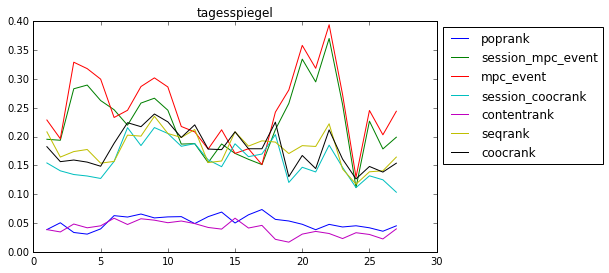

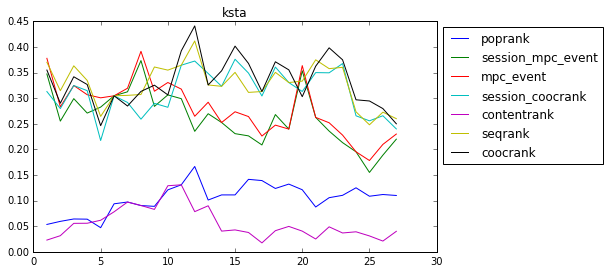

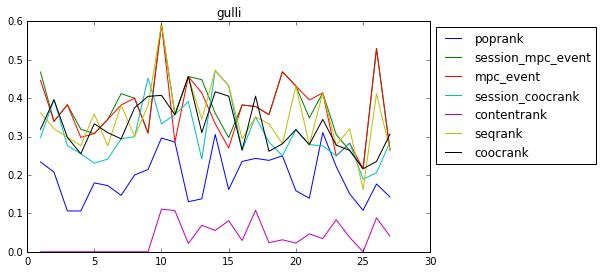

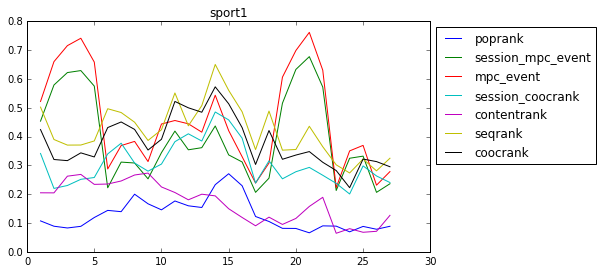

In [50]:
#recall per domain
i=0
for domain in domains:
    i = i + 1
    fig = plt.figure(figsize=(8,4))
    ax  = fig.add_subplot(111)
    ax.set_title(domain_mapping[domain])
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        ax.set_position([0.1,0.1,0.7,0.8])
        ax.plot(days, recall)
        ax.legend(rankers, loc="upper left", bbox_to_anchor=(1,1))
        fig.savefig('domain_%s_test1_recall.png' % domain)

In [22]:

import numpy as np
for domain in domains:
    for ranker in rankers:
        subresults = results.query('ranker == "%s" & domain == %s' % (ranker,domain))
        days = subresults['day']
        recall = subresults['recall']
        print(domain, ranker, np.mean(recall.values))
        

1677 poprank 0.051225039044
1677 session_mpc_event 0.225996497844
1677 mpc_event 0.249349127811
1677 session_coocrank 0.158497651583
1677 contentrank 0.0403937845718
1677 seqrank 0.179353405079
1677 coocrank 0.179430279251
418 poprank 0.104312306403
418 session_mpc_event 0.26262014401
418 mpc_event 0.2796585438
418 session_coocrank 0.311637345434
418 contentrank 0.0561157732139
418 seqrank 0.327494918646
418 coocrank 0.332482020809
694 poprank 0.194885184619
694 session_mpc_event 0.376233279619
694 mpc_event 0.367979313168
694 session_coocrank 0.304117228251
694 contentrank 0.0367413744994
694 seqrank 0.349381665898
694 coocrank 0.325722969712
35774 poprank 0.128338985305
35774 session_mpc_event 0.39603819071
35774 mpc_event 0.459348218949
35774 session_coocrank 0.307816645848
35774 contentrank 0.172188314497
35774 seqrank 0.418881487388
35774 coocrank 0.380958244846


In [49]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    recall = subresults['recall']
    print(ranker, np.mean(recall.values))

poprank 0.119690378843
session_mpc_event 0.315222028045
mpc_event 0.339083800932
session_coocrank 0.270517217779
contentrank 0.0763598116954
seqrank 0.318777869253
coocrank 0.304648378654


In [42]:
exclude = [13554, 596, 2522, 3336]
for ranker in rankers:
    subresults = results[-results['domain'].isin(exclude)].query('ranker == "%s"' % (ranker))
    days = subresults['day']
    precision = subresults['precision']
    print(ranker, np.mean(precision.values))

contentrank 0.01745706376
session_seqrank 0.326564988233
session_mpc_event 0.59183170775
mpc_event 0.577180138898
session_coocrank 0.268239279064
seqrank 0.310234787111
poprank 0.203464831037
coocrank 0.265670286997
